# Exploratory Data Analysis

In [80]:
# import data set

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer, QuantileTransformer
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense

from sklearn import metrics
from sklearn.metrics import roc_curve, auc


In [81]:
loan_df = pd.read_csv('loan_approval_dataset.csv')

print(loan_df.head())

   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

## Missing Values

In [82]:
# remove leading and trailing whitespaces from column names
loan_df.rename(columns=lambda x: x.strip(), inplace=True)


# checking for missing values
missing_values = loan_df.isnull().sum()

missing_values

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

## Data Types

In [83]:
# data types
data_types = loan_df.dtypes

data_types

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

In [84]:
# data dimension
loan_df.shape

(4269, 13)

## Exploring Categorical Vaiables

In [85]:
# counts of categorical

education_counts = loan_df['education'].value_counts()
self_employed_counts = loan_df['self_employed'].value_counts()
loan_status_counts = loan_df['loan_status'].value_counts()

print("The education counts:")
print(education_counts)
print("\nThe self employed counts:")
print(self_employed_counts)
print("\nThe loan status counts:")
print(loan_status_counts)

The education counts:
 Graduate        2144
 Not Graduate    2125
Name: education, dtype: int64

The self employed counts:
 Yes    2150
 No     2119
Name: self_employed, dtype: int64

The loan status counts:
 Approved    2656
 Rejected    1613
Name: loan_status, dtype: int64


 ### Categorical Visualization

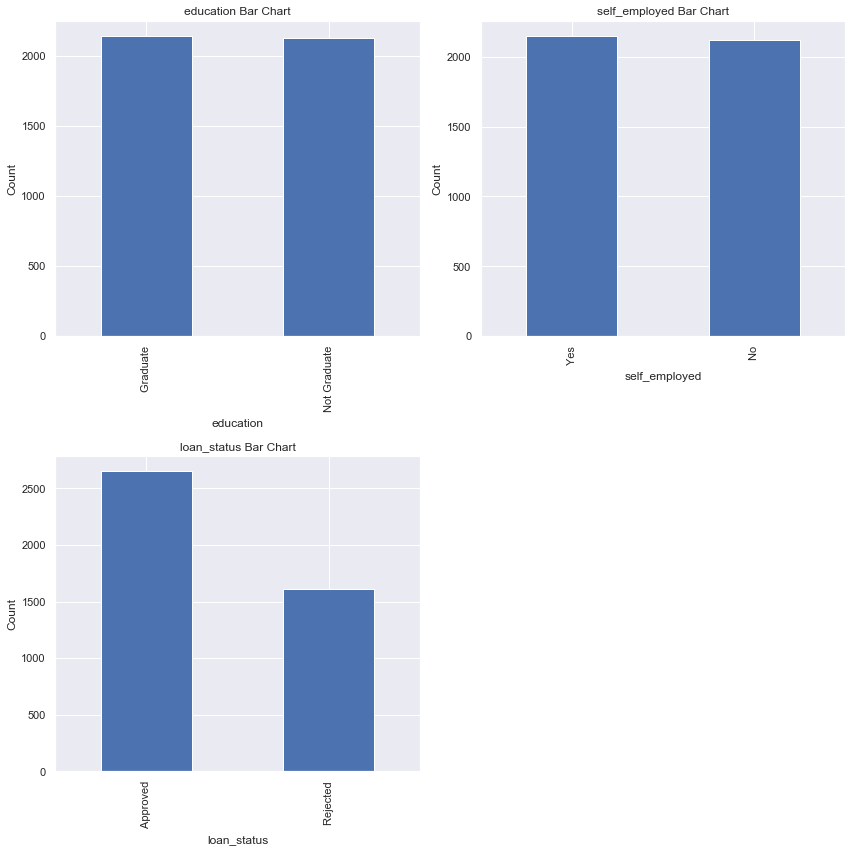

In [86]:
# bar charts
categorical_columns = ['education', 'self_employed', 'loan_status']

num_categorical = len(categorical_columns)
num_rows = (num_categorical - 1) // 2 + 1
num_cols = 2

plt.figure(figsize=(12, 6 * num_rows))

for idx, column in enumerate(categorical_columns):
    plt.subplot(num_rows, num_cols, idx + 1)
    value_counts = loan_df[column].value_counts()
    value_counts.plot(kind='bar')
    plt.title(column + " Bar Chart")
    plt.xlabel(column)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

## Exploring Numerical Variables

In [87]:
# summary statistics of numerical variables
summary_stats = loan_df.describe()

summary_stats

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


### Outlier Analysis with Visualizations

#### Histogram

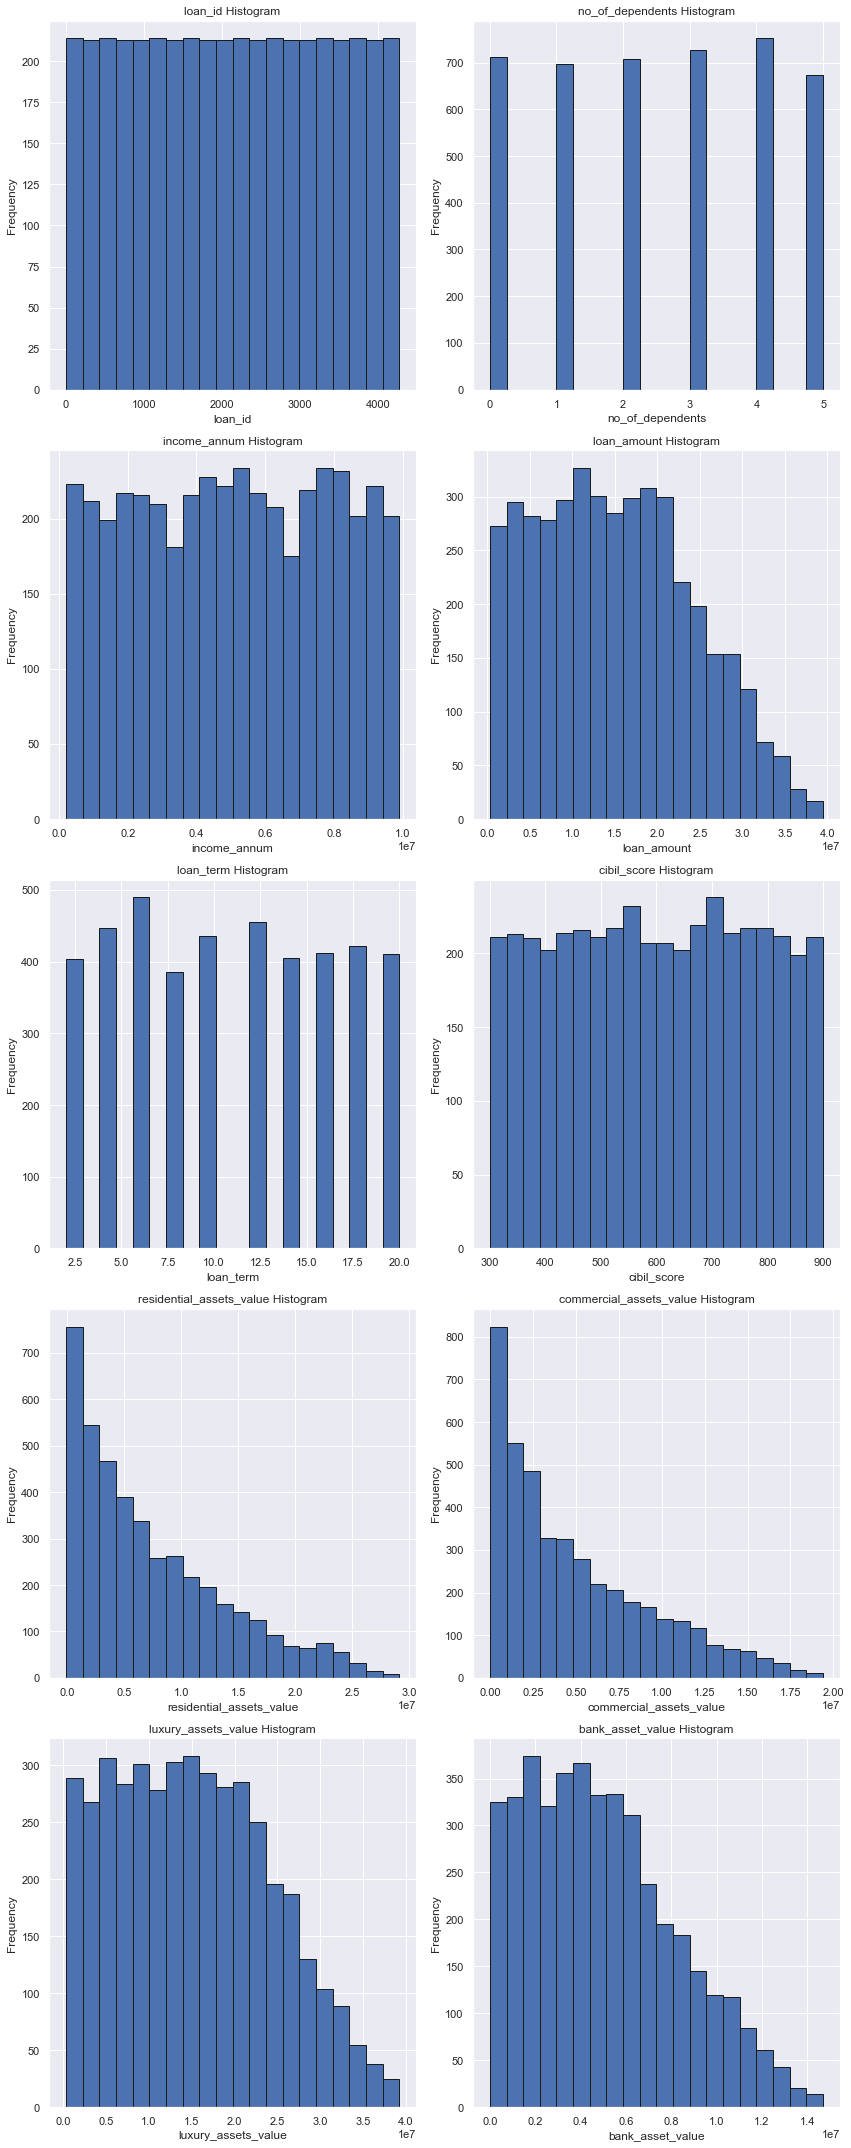

In [88]:
# histogram
numerical_columns = loan_df.select_dtypes(include=['float64', 'int64']).columns
num_numerical = len(numerical_columns)

# number of rows and columns for subplots
num_rows = (num_numerical - 1) // 2 + 1
num_cols = 2

plt.figure(figsize=(12, 6 * num_rows))

for idx, column in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, idx + 1)
    plt.hist(loan_df[column], bins=20, edgecolor='k')
    plt.title(column + " Histogram")
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

#### Bar Charts

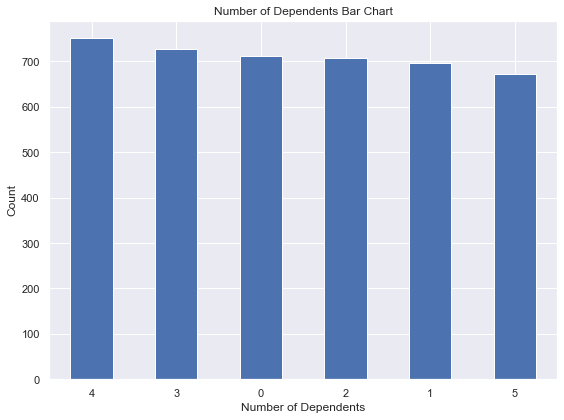

In [89]:
# bar charts for number of dependents
plt.figure(figsize=(8, 6))
loan_df['no_of_dependents'].value_counts().plot(kind='bar')
plt.title("Number of Dependents Bar Chart")
plt.xlabel("Number of Dependents")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Keep x-axis labels upright

plt.tight_layout()
plt.show()

#### Box Plots

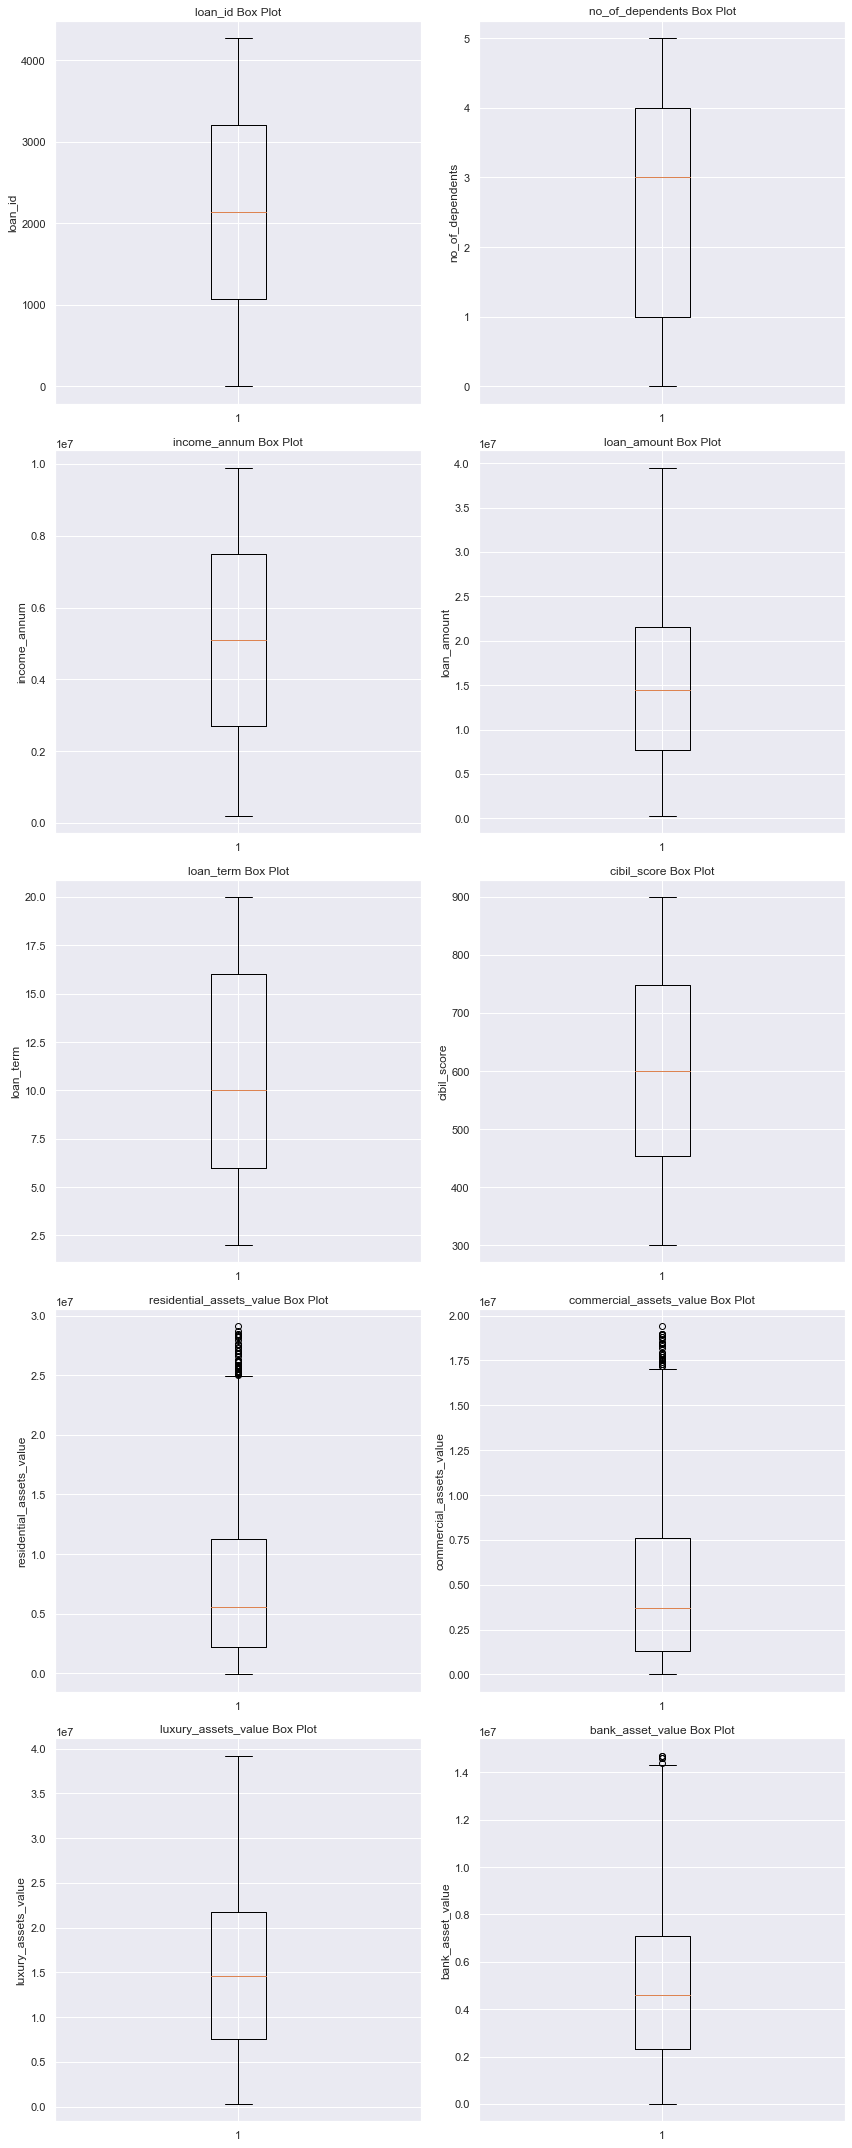

In [90]:
# box plots
plt.figure(figsize=(12, 6 * num_rows))

for idx, column in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, idx + 1)
    plt.boxplot(loan_df[column])
    plt.title(column + " Box Plot")
    plt.ylabel(column)

plt.tight_layout()
plt.show()

## Correlation  

In [91]:
# correlation matrix
correlation_matrix = loan_df.corr() 
correlation_matrix

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_id,1.000000,0.005326,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765
no_of_dependents,0.005326,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163
income_annum,0.012592,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093
loan_amount,0.008170,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122
loan_term,0.009809,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177
cibil_score,0.016323,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478
residential_assets_value,0.020936,0.007376,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418
commercial_assets_value,0.018595,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576
luxury_assets_value,-0.000862,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517
bank_asset_value,0.010765,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000


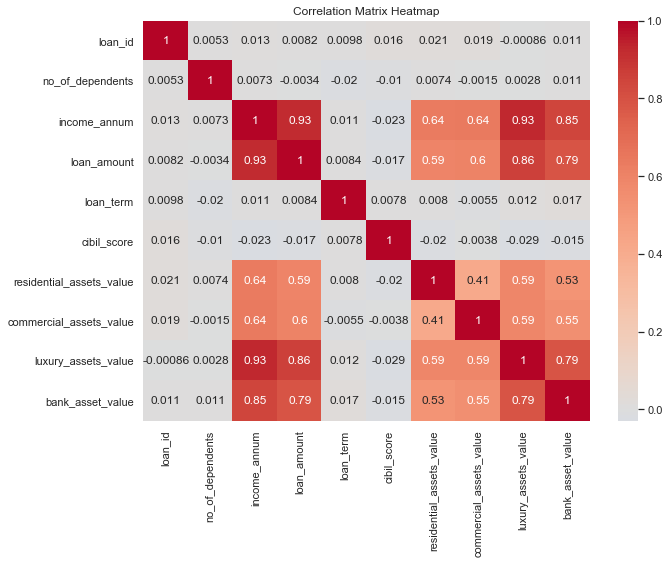

In [92]:
# heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title("Correlation Matrix Heatmap")

plt.tight_layout()
plt.show()

**Insights from Correlation matrix Heatmap-**

1. Income annum and loan amount have a strong positive correlation

2. The loan amount and all 4 assets (residential, commercial, luxury, and bank) have a moderate positive correlation.


## Data Pre-processing

## Feature Transformation

### Combine Numerical Features

Combine Residential, Commerical, luxury and Bank assets value into one variable total_assets and drop the others.

In [93]:
# Combining all asset values into one variable 
loan_df['total_assets'] = loan_df['residential_assets_value'] + loan_df['commercial_assets_value'] + loan_df['luxury_assets_value'] + loan_df['bank_asset_value']

# Drop all asset value fields 
loan_df = loan_df.drop(['residential_assets_value'], axis=1)
loan_df = loan_df.drop(['commercial_assets_value'], axis=1)
loan_df = loan_df.drop(['luxury_assets_value'], axis=1)
loan_df = loan_df.drop(['bank_asset_value'], axis=1)

### Histograms with density plot of total_assets and loan_amount

<Figure size 432x288 with 0 Axes>

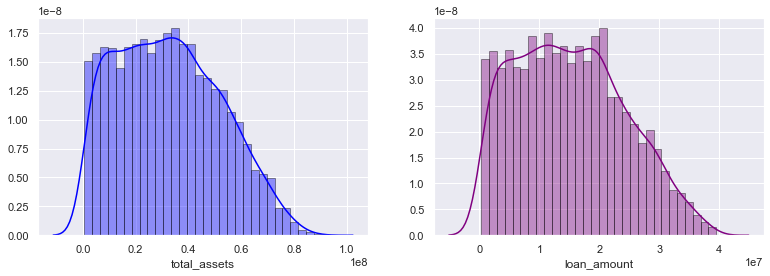

In [94]:
plt.figure()
fig, axes = plt.subplots(1, 2, figsize=(13, 4))
sns.distplot(a=loan_df['total_assets'], bins=30, color='blue', hist_kws={"edgecolor": 'black'}, ax=axes[0])
sns.distplot(a=loan_df['loan_amount'], bins=30, color='purple', hist_kws={"edgecolor": 'black'}, ax=axes[1])

plt.show()

### Distribution of total_assets and loan_amount in box plot

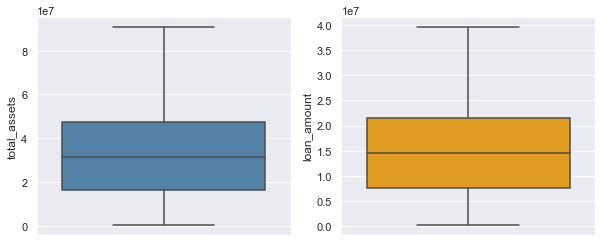

In [95]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.boxplot(y=loan_df["total_assets"], ax=axes[0], color='steelblue')
sns.boxplot(y=loan_df["loan_amount"], ax=axes[1], color='orange')

### Quantile Transformation

In [96]:
# Quantile Transformation
# quantile = QuantileTransformer(output_distribution='normal')
# loan_df['total_assets'] = quantile.fit_transform(loan_df['total_assets'].values.reshape(-1, 1))

# loan_df['loan_amount'] = quantile.fit_transform(loan_df['loan_amount'].values.reshape(-1, 1))

# plt.figure()
# fig, axes = plt.subplots(1, 2, figsize=(13, 4))
# sns.distplot(a=loan_df['total_assets'], bins=30, color='blue', ax=axes[0])
# sns.distplot(a=loan_df['loan_amount'], bins=30, color='purple', ax=axes[1])

# plt.show()

In [97]:
# sns.set(style="darkgrid")
# fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# sns.boxplot(y=loan_df["total_assets"], ax=axes[0])
# sns.boxplot(y=loan_df["loan_amount"], ax=axes[1])

## Correlation Based Feature Selection

**From the Correlation matrix, it is observed that income_annum and loan_amount variables are the most correlated predictors.**

In [98]:
# Define Predictor A as income_annum
predictor_A = 'income_annum'

# Calculate average correlation between predictor A and other predictors
avg_corr_A = correlation_matrix[predictor_A].drop(predictor_A).mean()
avg_corr_A

0.4436877752988143

In [99]:
# Define Predictor B as loan_amount
predictor_B = 'loan_amount'

# Calculate average correlation between predictor A and other predictors
avg_corr_B = correlation_matrix[predictor_B].drop(predictor_B).mean()
avg_corr_B

0.41894403416465464

**Predictor A has a larger average correlation, hence dropping the predictor income_annum and using the predictors education, loan_amount, and total assets for our final model.**

### Drop irrelevant fields

In [100]:
# Drop loan id
loan_df = loan_df.drop(['loan_id'], axis=1)

# Drop no of dependents
loan_df = loan_df.drop(['no_of_dependents'], axis=1)

# Drop self employed
loan_df = loan_df.drop(['self_employed'], axis=1)

# Drop income annum
loan_df = loan_df.drop(['income_annum'], axis=1)

# Drop loan term
loan_df = loan_df.drop(['loan_term'], axis=1)


## Data Partition

The appropriate features for our final model are: **education, loan_amount, cibil_score, total_assets, loan_status.**

In [101]:
loan_df.head()

,education,loan_amount,cibil_score,loan_status,total_assets
0,Graduate,29900000,778,Approved,50700000
1,Not Graduate,12200000,417,Rejected,17000000
2,Graduate,29700000,506,Rejected,57700000
3,Graduate,30700000,467,Rejected,52700000
4,Not Graduate,24200000,382,Rejected,55000000


In [102]:
# Split the training and test data
loan_train, loan_test = train_test_split(loan_df, test_size=0.33, random_state=7)

In [103]:
# Proportions of training and test data
train_prop = len(loan_train)/len(loan_df)
test_prop = len(loan_test)/len(loan_df)

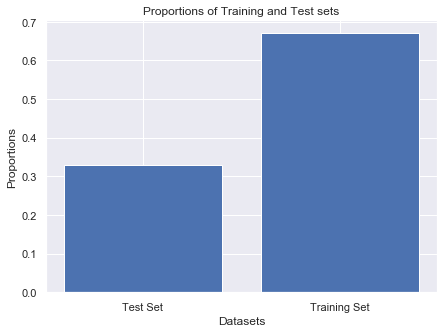

In [104]:
plt.figure(figsize=(7,5))
labels = ['Test Set', 'Training Set']
proportions = [test_prop, train_prop]
plt.bar(labels,proportions)
plt.xlabel("Datasets")
plt.ylabel("Proportions")
plt.title("Proportions of Training and Test sets")
plt.show()

## Data Rebalancing

In [105]:
print("No of records in the training data set:",len(loan_train))

print("\nNo of records in the test data set:",len(loan_test))

print("\nLoan status counts:")
print(loan_train['loan_status'].value_counts())

No of records in the training data set: 2860

No of records in the test data set: 1409

Loan status counts:
 Approved    1791
 Rejected    1069
Name: loan_status, dtype: int64


**To check the rebalancing in the dataset, it is observed that 63% of records have loan status Approved and 37% Rejected. Hence, no resampling is required.**

### Encoding categorical variables

In [106]:
# Convert categorical variables to dummy variables

loan_train = pd.get_dummies(loan_train, columns=['education'],drop_first=True)
loan_test = pd.get_dummies(loan_test, columns=['education'], drop_first=True)

loan_train.rename(columns={'education_ Not Graduate':'education'}, inplace=True)
loan_test.rename(columns={'education_ Not Graduate':'education'}, inplace=True)


### Separate predictors and target variables

In [107]:
# Separate variables in training set
X_train = loan_train.drop(['loan_status'], axis=1)
y_train = loan_train['loan_status']

# Separate variables in test set
X_test = loan_test.drop(['loan_status'], axis=1)
y_test = loan_test['loan_status']


### Standardize the numeric variables

In [108]:
# standardize the values within the training data

norm_loan_amt = (X_train['loan_amount']-X_train['loan_amount'].mean())/X_train['loan_amount'].std()
norm_cibil_score = (X_train['cibil_score']-X_train['cibil_score'].mean())/X_train['cibil_score'].std()
norm_tot_assets = (X_train['total_assets']-X_train['total_assets'].mean())/X_train['total_assets'].std()

# concatenate the normalized values into a dataframe
X_train = pd.concat((norm_loan_amt, norm_cibil_score, norm_tot_assets, X_train['education']), axis=1)

In [109]:
# standardize the values within the test data

norm_loan_amt_test = (X_test['loan_amount']-X_test['loan_amount'].mean())/X_test['loan_amount'].std()
norm_cibil_score_test = (X_test['cibil_score']-X_test['cibil_score'].mean())/X_test['cibil_score'].std()
norm_tot_assets_test = (X_test['total_assets']-X_test['total_assets'].mean())/X_test['total_assets'].std()

# concatenate the normalized values into a dataframe
X_test = pd.concat((norm_loan_amt_test, 
                    norm_cibil_score_test, norm_tot_assets_test, X_test['education']), axis=1)

# Modeling

## Logistic Regression Modeling

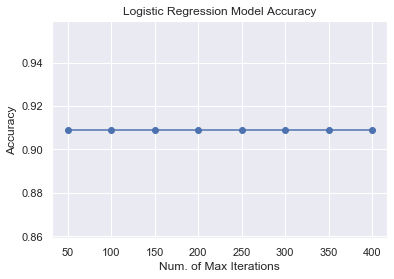

In [110]:

max_iter_values = np.arange(50, 401, 50)
accuracy_scores = []

#model is trained and utilized to make predictions
for max_iter in max_iter_values:
    
    LRmodel = LogisticRegression(solver='saga', max_iter=max_iter, random_state=7)
    
    LRmodel.fit(X_train, y_train)
    
    y_pred_logreg = LRmodel.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred_logreg)
    accuracy_scores.append(accuracy)

#accuracy is plotted
plt.plot(max_iter_values, accuracy_scores, marker='o')
plt.xlabel("Num. of Max Iterations")
plt.ylabel("Accuracy")
plt.title("Logistic Regression Model Accuracy")
plt.grid(True)
plt.show()

## Evaluation of the Logistic Regression Model

Accuracy: 0.9091554293825408
Classification Report:
               precision    recall  f1-score   support

    Approved       0.92      0.93      0.93       865
    Rejected       0.89      0.88      0.88       544

    accuracy                           0.91      1409
   macro avg       0.90      0.90      0.90      1409
weighted avg       0.91      0.91      0.91      1409



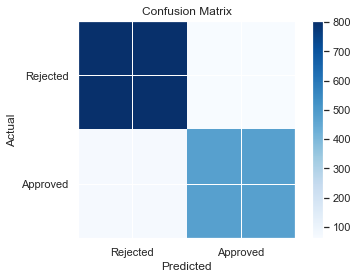

In [111]:
LRmodel = LogisticRegression(solver='saga', max_iter=100, random_state=7)

LRmodel.fit(X_train, y_train)

y_pred_logreg = LRmodel.predict(X_test)

#accuracy is plotted
accuracy = accuracy_score(y_test, y_pred_logreg)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

conf_matrix = confusion_matrix(y_test, y_pred_logreg)
plt.imshow(conf_matrix, cmap=plt.cm.Blues, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.yticks([0, 1], ['Rejected', 'Approved'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## K nearest neighbor Modeling

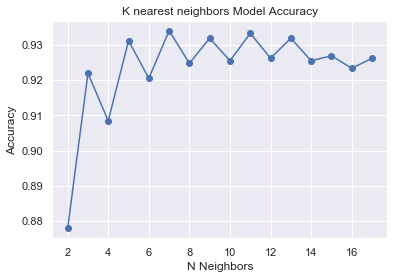

In [112]:

n_neighbors_values = np.arange(2, 18)
accuracy_scores = []

#model is trained and utilized to make predictions
for n_neighbors in n_neighbors_values:
    KNNmodel = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    KNNmodel.fit(X_train, y_train)
    
    y_pred_knn = KNNmodel.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred_knn)
    accuracy_scores.append(accuracy)

#accuracy is plotted
plt.plot(n_neighbors_values, accuracy_scores, marker='o')
plt.xlabel("N Neighbors")
plt.ylabel("Accuracy")
plt.title("K nearest neighbors Model Accuracy")
plt.grid(True)
plt.show()

# Evaluation of the KNN Model

KNN best accuracy: 93.40%
Classification Report:
               precision    recall  f1-score   support

    Approved       0.95      0.92      0.94       865
    Rejected       0.88      0.93      0.91       544

    accuracy                           0.93      1409
   macro avg       0.92      0.93      0.92      1409
weighted avg       0.93      0.93      0.93      1409



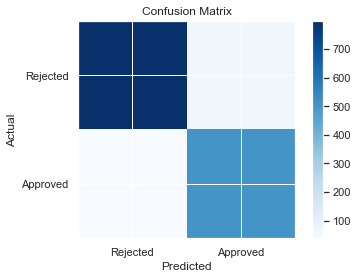

In [113]:
#accuracy is plotted
best_accuracy = max(accuracy_scores)
print("KNN best accuracy: {:.2f}%".format(best_accuracy * 100))

print("Classification Report:\n", classification_report(y_test, y_pred_knn))

conf_matrix = confusion_matrix(y_test, y_pred_knn)
plt.imshow(conf_matrix, cmap=plt.cm.Blues, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.yticks([0, 1], ['Rejected', 'Approved'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Decision Tree Modeling

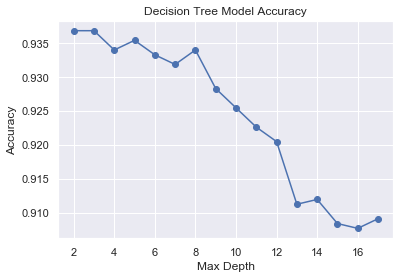

In [114]:

max_depth_values = np.arange(2, 18)
accuracy_scores = []

#model is trained and utilized to make predictions
for max_depth in max_depth_values:
    DTmodel = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    
    DTmodel.fit(X_train, y_train)
    
    y_pred_dectree = DTmodel.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred_dectree)
    accuracy_scores.append(accuracy)

#accuracy is plotted
plt.plot(max_depth_values, accuracy_scores, marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Model Accuracy")
plt.grid(True)
plt.show()

# Decision Tree Model Evaluation

In [115]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_dectree = DTmodel.predict(X_test)

#accuracy is plotted
accuracy = accuracy_score(y_test, y_pred_dectree)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred_dectree)
print("Confusion Matrix:\n", conf_matrix)

report = classification_report(y_test, y_pred_dectree)
print("Classification Report:\n", report)

Accuracy: 0.9091554293825408
Confusion Matrix:
 [[806  59]
 [ 69 475]]
Classification Report:
               precision    recall  f1-score   support

    Approved       0.92      0.93      0.93       865
    Rejected       0.89      0.87      0.88       544

    accuracy                           0.91      1409
   macro avg       0.91      0.90      0.90      1409
weighted avg       0.91      0.91      0.91      1409



## Random Forest Modeling

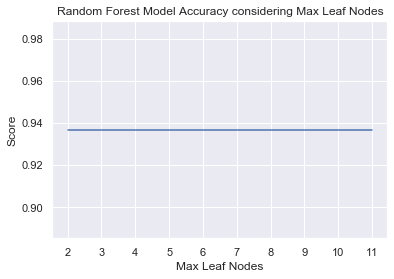

In [116]:

scoreListRF = []

#model is trained and utilized to make predictions
for i in range(2, 12):
    RFclassifier = RandomForestClassifier(n_estimators=200, max_depth=4, max_leaf_nodes=i, random_state=50)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

#accuracy is plotted
plt.plot(range(2, 12), scoreListRF)
plt.xticks(np.arange(2, 12))
plt.xlabel("Max Leaf Nodes")
plt.ylabel("Score")
plt.title("Random Forest Model Accuracy considering Max Leaf Nodes")
plt.grid(True)
plt.show()



## Random Forest Evaluation

In [117]:
best_max_leaf_nodes = np.argmax(scoreListRF) + 2  
RFclassifier = RandomForestClassifier(n_estimators=100, max_depth=4, max_leaf_nodes=best_max_leaf_nodes, random_state=42)
RFclassifier.fit(X_train, y_train)

y_pred_ranfor = RFclassifier.predict(X_test)

#accuracy is plotted
accuracy = accuracy_score(y_test, y_pred_ranfor)
print("Random Forest Accuracy: {:.2f}%".format(accuracy * 100))

conf_matrix = confusion_matrix(y_test, y_pred_ranfor)
print("Confusion Matrix:\n", conf_matrix)

report = classification_report(y_test, y_pred_ranfor, zero_division=0)
print("Classification Report:\n", report)

Random Forest Accuracy: 93.68%
Confusion Matrix:
 [[797  68]
 [ 21 523]]
Classification Report:
               precision    recall  f1-score   support

    Approved       0.97      0.92      0.95       865
    Rejected       0.88      0.96      0.92       544

    accuracy                           0.94      1409
   macro avg       0.93      0.94      0.93      1409
weighted avg       0.94      0.94      0.94      1409



## Neural Network Modeling

### Convert target variables to numeric format

In [118]:
# convert target variable to dataframe

y_train_df = pd.DataFrame(loan_train['loan_status'])
y_test_df = pd.DataFrame(loan_test['loan_status'])

# convert string to numeric

y_train_df['loan_status'] = y_train_df['loan_status'].replace({' Approved': 1, ' Rejected': 0})
y_train_df = pd.to_numeric(y_train_df['loan_status'])

y_test_df['loan_status'] = y_test_df['loan_status'].replace({' Approved': 1, ' Rejected': 0})
y_test_df = pd.to_numeric(y_test_df['loan_status'])

### Convert variables into 1-dimensional numpy array

In [119]:
# predictor variables

loan_amt_1d = np.array(norm_loan_amt).reshape(-1, 1)
cibil_score_1d = np.array(norm_cibil_score).reshape(-1, 1)
tot_assets_1d = np.array(norm_tot_assets).reshape(-1, 1)
educ_1d = np.array(X_train['education']).reshape(-1, 1)

# Target variable
ytrain_1d = np.array(y_train_df).reshape(-1, 1)

In [120]:
# redefine predictor and target features

X_train_arr = np.concatenate((loan_amt_1d, cibil_score_1d, tot_assets_1d, educ_1d), axis=1)

y_train_arr = ytrain_1d

**•	We define a neural network model using the Sequential class from Keras. This model is built in a sequential manner, where layers are added one after the other.**

**•	The first layer is a Dense layer with 60 neurons and the rectified linear unit (ReLU) activation function is used to introduce non-linearity.**

**•	The second layer is also a Dense layer but with 1 neuron and the sigmoid activation. This layer is the output layer which produces a binary output.**


In [121]:
# define the neural network model 

nnet_model = Sequential()
nnet_model.add(Dense(60, activation='relu'))
nnet_model.add(Dense(1, activation='sigmoid'))

# compile the keras model
nnet_model.compile(
loss='binary_crossentropy',
optimizer='sgd',
metrics=['accuracy']
)

# train the neural network model
history = nnet_model.fit(X_train_arr, y_train_arr, epochs=30, batch_size=32)

Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
90/90 [==============================] - 1s 2ms/step - loss: 0.5480 - accuracy: 0.8944
Epoch 2/30
90/90 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.9003
Epoch 3/30
90/90 [==============================] - 0s 2ms/step - loss: 0.3943 - accuracy: 0.9059
Epoch 4/30
90/90 [==============================] - 0s 2ms/step - loss: 0.3542 - acc

## Neural Network Model Evaluation

In [122]:
# make predictions using test data
y_pred_nnet = (nnet_model.predict(X_test) > 0.5).astype(int)

# Accuracy of the model
accuracy = accuracy_score(y_test_df, y_pred_nnet)
print("\nNeural Network Accuracy: {:.2f}%".format(accuracy * 100))

conf_matrix = confusion_matrix(y_test_df, y_pred_nnet)
print("\nConfusion Matrix:\n", conf_matrix)

report = classification_report(y_test_df, y_pred_nnet, zero_division=0)
print("\nClassification Report:\n", report)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
45/45 [==============================] - 0s 1ms/step

Neural Network Accuracy: 91.77%

Confusion Matrix:
 [[493  51]
 [ 65 800]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       544
           1       0.94      0.92      0.93       865

    accuracy                           0.92      1409
   mac

## Models ROC_AUC Comparison

Text(0.5, 1.0, 'ROC AUC Curves for each model')

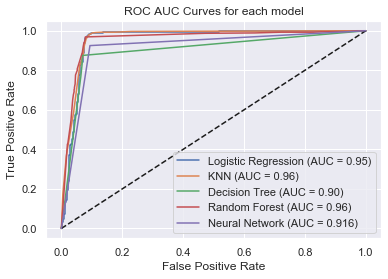

In [123]:

disp = metrics.plot_roc_curve(LRmodel, X_test, y_test, name = 'Logistic Regression')
metrics.plot_roc_curve(KNNmodel, X_test, y_test, ax=disp.ax_, name = 'KNN')
metrics.plot_roc_curve(DTmodel, X_test, y_test, ax=disp.ax_, name = 'Decision Tree')
metrics.plot_roc_curve(RFclassifier, X_test, y_test, ax=disp.ax_, name = 'Random Forest')
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_df, y_pred_nnet)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Neural Network (AUC = {:.3f})'.format(auc_keras))
plt.legend()
plt.title('ROC AUC Curves for each model')

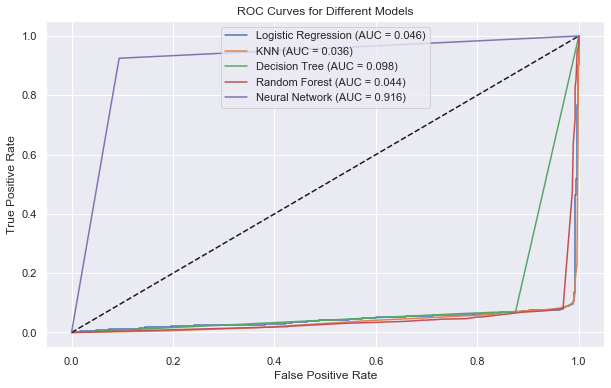

In [124]:
#i recieved an error from sklearn.mettrics so i created this so i could see the plot
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# convert categorical labels to binary labels
y_test_binary = (y_test == ' Approved').astype(int)  # Map 'Approved' to 1, 'Rejected' to 0

# calculate ROC curves and AUC for each model
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_binary, LRmodel.predict_proba(X_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_binary, KNNmodel.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_binary, DTmodel.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_binary, RFclassifier.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_nnet, tpr_nnet, thresholds_nnet = roc_curve(y_test_df, y_pred_nnet)
roc_auc_nnet = auc(fpr_nnet, tpr_nnet)

# plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.3f})'.format(roc_auc_lr))
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.3f})'.format(roc_auc_knn))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.3f})'.format(roc_auc_dt))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.3f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_nnet, tpr_nnet, label='Neural Network (AUC = {:.3f})'.format(roc_auc_nnet))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()

# Baseline Model

Majority Class Classifier (Baseline) Accuracy: 61.39%


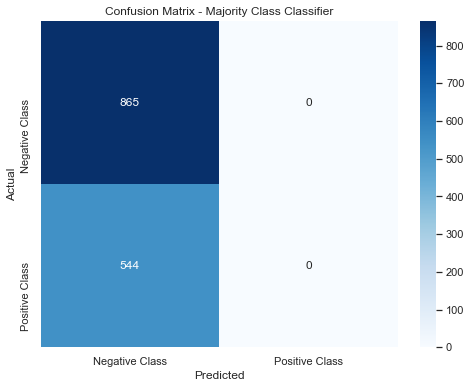

Majority Class Classifier Classification Report:
               precision    recall  f1-score   support

    Approved       0.61      1.00      0.76       865
    Rejected       0.00      0.00      0.00       544

    accuracy                           0.61      1409
   macro avg       0.31      0.50      0.38      1409
weighted avg       0.38      0.61      0.47      1409



In [125]:
from sklearn.dummy import DummyClassifier

#majority class classifier as a baseline model
baseline_model = DummyClassifier(strategy="most_frequent")

# fit the baseline model
baseline_model.fit(X_train, y_train)

# predict using the baseline model
y_pred_baseline = baseline_model.predict(X_test)

# calculate accuracy for the baseline model
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
print("Majority Class Classifier (Baseline) Accuracy: {:.2f}%".format(accuracy_baseline * 100))

# other metrics for the baseline model
conf_matrix_baseline = confusion_matrix(y_test, y_pred_baseline)
# class labels
class_labels = ['Negative Class', 'Positive Class']

# confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_baseline, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Majority Class Classifier')
plt.show()

report_baseline = classification_report(y_test, y_pred_baseline, zero_division=0)
print("Majority Class Classifier Classification Report:\n", report_baseline)

## Comparing Models to Baseline

In [126]:
from sklearn.metrics import accuracy_score

# dictionary to store model names and accuracy scores
model_accuracy = {}

# accuracy for each model
model_accuracy['Baseline'] = accuracy_score(y_test, y_pred_baseline)
model_accuracy['Logistic Regression'] = accuracy_score(y_test, y_pred_logreg)
model_accuracy['KNN'] = accuracy_score(y_test, y_pred_knn)
model_accuracy['Decision Tree'] = accuracy_score(y_test, y_pred_dectree)
model_accuracy['Random Forest'] = accuracy_score(y_test, y_pred_ranfor)
model_accuracy['Neural Network'] = accuracy_score(y_test_df, y_pred_nnet)

print(model_accuracy)

{'Baseline': 0.6139105748757985, 'Logistic Regression': 0.9091554293825408, 'KNN': 0.9261887863733144, 'Decision Tree': 0.9091554293825408, 'Random Forest': 0.9368346344925479, 'Neural Network': 0.9176721078779276}


## Barchart Visualizations of Accuracy Comparisons

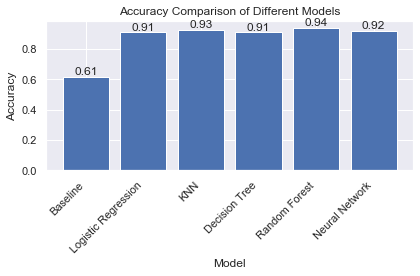

In [127]:
# bar plot to visualize accuracy comparison
fig, ax = plt.subplots()
ax.bar(range(len(model_accuracy)), model_accuracy.values())
ax.set_xticks(range(len(model_accuracy)))
ax.set_xticklabels(model_accuracy.keys(), rotation=45, ha="right")
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison of Different Models')

# Annotate bars with accuracy values on top of the bars
for i, accuracy in enumerate(model_accuracy.values()):
    ax.text(i, accuracy, f'{accuracy:.2f}', ha='center', va='bottom')

plt.tight_layout()  # Adjust layout for better visualization of annotations
plt.show()